<H1>The following cell imports the csv file into two lists of each feature.</H1>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

data = pd.read_csv(r'C:\Users\evana\Untitled Folder\cars(4).csv')
data_mpg = data['mpg'].tolist();
data_weight = data['weight'].tolist();

print(data)
print(data_mpg)
print(data_weight)

     mpg  weight
0   21.0   2.620
1   21.0   2.875
2   22.8   2.320
3   21.4   3.215
4   18.7   3.440
5   18.1   3.460
6   14.3   3.570
7   24.4   3.190
8   22.8   3.150
9   19.2   3.440
10  17.8   3.440
11  16.4   4.070
12  17.3   3.730
13  15.2   3.780
14  10.4   5.250
15  10.4   5.424
16  14.7   5.345
17  32.4   2.200
18  30.4   1.615
19  33.9   1.835
20  21.5   2.465
21  15.5   3.520
22  15.2   3.435
23  13.3   3.840
24  19.2   3.845
25  27.3   1.935
26  26.0   2.140
27  30.4   1.513
28  15.8   3.170
29  19.7   2.770
30  15.0   3.570
31  21.4   2.780
[21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
[2.62, 2.875, 2.32, 3.215, 3.44, 3.46, 3.57, 3.19, 3.15, 3.44, 3.44, 4.07, 3.73, 3.78, 5.25, 5.424, 5.345, 2.2, 1.615, 1.835, 2.465, 3.52, 3.435, 3.84, 3.845, 1.935, 2.14, 1.513, 3.17, 2.77, 3.57, 2.78]


<H1>******PART A********</H1>

Scale the feature weight using mean normalization.
Print the first 5 values of scaled weight. Calculate the mean and variance of scaled weight.

In [2]:
scaled_weight = []
count = 0
temp_sum = 0
mean = 0

#Total of the weight then calculating the mean 
for count in range(len(data_weight)):
    temp_sum += data_weight[count]

mean = temp_sum / len(data_weight)
print("Population mean: ", mean)

#Initializing the scaled weight list and scaling the weight 
temp = 0
for count in range(len(data_weight)):
    temp += (data_weight[count] - mean)**2

std = math.sqrt(temp/len(data_weight))

for count in range(len(data_weight)):
    scaled_weight.append((data_weight[count]-mean)/std)

#Prints the first 5 values of scaled weight
for count in range(5):
    print("Scaled Weight ", count+1, " :", scaled_weight[count])

#Calculating the mean of scaled weights
mean_sum = 0
for count in range(len(scaled_weight)):
    mean_sum += scaled_weight[count]
    
scaled_mean = mean_sum / len(scaled_weight)

#Calculating the variance of scaled weight
scaled_temp = 0
for count in range(len(scaled_weight)):
    scaled_temp += (scaled_weight[count] - mean)**2

scaled_variance = scaled_temp / len(scaled_weight)

print("Scaled_Weight Mean: ", scaled_mean)
print("Scaled_Weight Variance:", scaled_variance)

Population mean:  3.2172499999999995
Scaled Weight  1  : -0.6201665807281301
Scaled Weight  2  : -0.35538218878895345
Scaled Weight  3  : -0.9316776300683385
Scaled Weight  4  : -0.0023363328700511873
Scaled Weight  5  : 0.23129695413510493
Scaled_Weight Mean:  4.9439619065339e-16
Scaled_Weight Variance: 11.350697562499995


<H1>******PART B*******</H1>

Make a scatter plot of mpg (on y-axis) and scaled weight (on x-axis). What is your interpretation
of the plot?

<AxesSubplot:title={'center':'MPG to Normalized Weight'}, xlabel='Scaled_Weight', ylabel='mpg'>

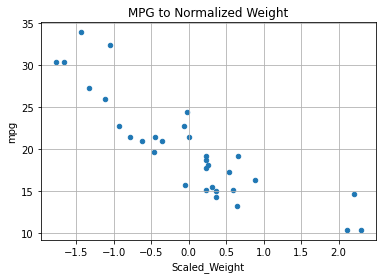

In [3]:
#Use pandas to make scatter plot 
data['Scaled_Weight'] = scaled_weight
data.plot.scatter(x = 'Scaled_Weight', y = 'mpg', title = "MPG to Normalized Weight", grid = True)

<H4>Interpretation of MPG to Noramlized Weight</H4>

The scatter plot shows a negative correlation between mpg and weight. 
As the weight increases, the mpg decreases. This data is not highly correlated.

<H1>******PART C*******</H1>

Learn a simple linear hypothesis to predict mpg based on scaled weight using the gradient descent
algorithm. Set the random initialization for each of the parameters as 0, the learning rate as .20,
and the convergence threshold as 1e−5

In [4]:
#Initializing Theta0 & Theta1
theta0 = 0
theta1 = 0

#Old Thetas
last_theta0 = 1
last_theta1 = 1

# Initialize learning rate and convergence
learning_rate = 0.2
convergence = 1e-5

#Cost Function
J = 0  # should be a singular number
last_cost = 0
converged = False

#Initializing the hypothesis
H = [0] * len(scaled_weight)

#Continues until the the change in theta0 and theta1 is less than the convergence
while not converged:
    #Creating hypothesises
    for count in range(len(scaled_weight)):
        H[count] = theta0 + theta1 * scaled_weight[count]

    #Creating the sums used in the cost value and theta calculations
    temp_sum = [0] * len(scaled_weight)
    temp_sum_squared = [0] * len(scaled_weight)
    for count in range(len(scaled_weight)):
        temp_sum[count] = H[count] - data_mpg[count]
        temp_sum_squared[count] = temp_sum[count] ** 2

    #Creating the sums usied in the cost value and theta calculations
    #***These could have been combined but due to amount I chose to separate for readability
    H_sum = 0
    H_squared_sum = 0
    theta1_derivitive = 0
    for count in range(len(scaled_weight)):
        H_sum += temp_sum[count]
        H_squared_sum += temp_sum_squared[count]
        theta1_derivitive += temp_sum[count] * scaled_weight[count]

    #Calculating the cost of each iteration
    J = (1 / (2 * len(scaled_weight))) * H_squared_sum

    #Checking for convergence
    if abs(theta0 - last_theta0) < convergence and abs(theta1 - last_theta1) < convergence:
        converged = True
    else:
        #Saving previous thetas and cost
        last_cost = J
        last_theta0 = theta0
        last_theta1 = theta1
        #Creating the new thetas
        theta0 = theta0 - (learning_rate * (1 / len(scaled_weight)) * H_sum)
        theta1 = theta1 - (learning_rate * (1 / len(scaled_weight)) * theta1_derivitive)

print("Theta0: ", theta0)
print("Theta1: ", theta1)
print("Done.")

Theta0:  20.09058651400847
Theta1:  -5.146971203174536
Done.


$$H(\theta) = \hat\theta 0 + \hat\theta 1 * X$$

<H1>******PART D******</H1>

Plot/overlay the learned hypothesis from 1c on the scatter plot from 1b. What is your interpretation of the plot?

<function matplotlib.pyplot.show(close=None, block=None)>

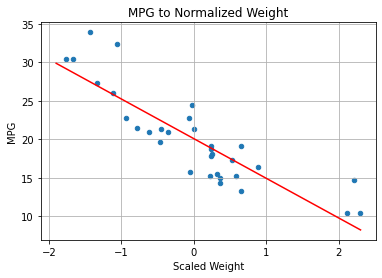

In [48]:
plot_data = pd.DataFrame({'Scaled Weight':scaled_weight, 'MPG':data_mpg})

ax = plot_data.plot(kind='scatter', x='Scaled Weight', y = 'MPG', title = "MPG to Normalized Weight", grid = True)

def plotline(x, y, ax):
    ax.plot(x, y, color = 'r')

plotline([-1.9, 2.3], [29.86983180004009, 8.25255274670704], ax)
    
plt.show()

<H4>Interpretation</H4>
$$H(\theta) = 20.09058651400847 + -5.146971203174536 * X$$
The line the algorithm provided gives a trendline that can be used to predict the MPG given a weight around the shown data's range. Upong observing the two ends of the data, it seems the upper end(scaled weight > 1) starts to flatten out and stray away from the seemingly more accurate trendline predictions in the middle of the dataset, and the lower end(scaled weight < -1) seems to become more vertical. A hypothesis for the reasoning behind this would be that you cannot have negative miles per gallon and current engines can only become so inefficent, or they are outliers in the data set. Given that observation, a exponential trend"curve" could be a more accurate predictor of the data.


<H1>*****PART E*****</H1>

Repeat 1c for the following choices of the learning rate

In [82]:
#This code is the same as above but with an outter for loop to 
#iterate through the different learning rates
#It calculates the run time for each provided learning rate, and appends 
#the cost function values to a list for each run time
theta0 = 0
theta1 = 0

last_theta0 = 1
last_theta1 = 1

# Initialize learning rate and convergence
learning_rate = 0.2
convergence = 1e-5

#Learning rate changes for each iteration of the Gradient Descent Algorithm
learning_rate_list = [0.1, 0.15, 0.2, 0.25, 0.3]
#Cost function values for each rate
cost_function_1 = []
cost_function_2 = []
cost_function_3 = []
cost_function_4 = []
cost_function_5 = []

cost_function_values = [cost_function_1, cost_function_2, cost_function_3, cost_function_4, cost_function_5]
#Time lists [start_time, end_time]
run_time = []
start_time = 0
end_time = 0
J = 0  # should be a singular number
last_cost = 0
converged = False
H = [0] * len(scaled_weight)
for rate_number in range(len(learning_rate_list)):

    learning_rate = learning_rate_list[rate_number]

    converged = False
    theta0 = 0
    theta1 = 0

    last_theta0 = 1
    last_theta1 = 1
    start_time = time.time()
    while not converged:
        for count in range(len(scaled_weight)):
            H[count] = theta0 + theta1 * scaled_weight[count]

        temp_sum = [0] * len(scaled_weight)
        temp_sum_squared = [0] * len(scaled_weight)
        for count in range(len(scaled_weight)):
            temp_sum[count] = H[count] - data_mpg[count]
            temp_sum_squared[count] = temp_sum[count] ** 2

        H_sum = 0
        H_squared_sum = 0
        theta1_derivitive = 0
        for count in range(len(scaled_weight)):
            H_sum += temp_sum[count]
            H_squared_sum += temp_sum_squared[count]
            theta1_derivitive += temp_sum[count] * scaled_weight[count]

        J = (1 / (2 * len(scaled_weight))) * H_squared_sum
        cost_function_values[rate_number].append(J)

        if abs(theta0 - last_theta0) < convergence and abs(theta1 - last_theta1) < convergence:
            converged = True
        else:
            last_cost = J
            last_theta0 = theta0
            last_theta1 = theta1
            theta0 = theta0 - (learning_rate * (1 / len(scaled_weight)) * H_sum)
            theta1 = theta1 - (learning_rate * (1 / len(scaled_weight)) * theta1_derivitive)
    
    end_time = time.time()
    print(learning_rate)
    print("Theta0: ", theta0)
    print("Theta1: ", theta1)
    print("Done")
    run_time.append([start_time, end_time])

0.1
Theta0:  20.09053600470401
Theta1:  -5.1469582632867255
Done
0.15
Theta0:  20.090571655631425
Theta1:  -5.146967396633661
Done
0.2
Theta0:  20.09058651400847
Theta1:  -5.146971203174536
Done
0.25
Theta0:  20.09059803050423
Theta1:  -5.14697415356486
Done
0.3
Theta0:  20.090606726699004
Theta1:  -5.146976381427349
Done


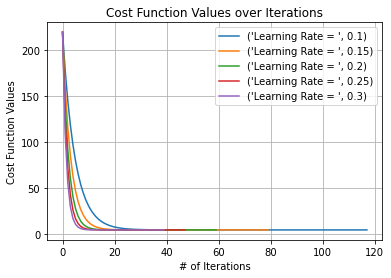

In [76]:
#Creates the data to be able to plot each line using a nested for loop
iteration_num = 0
for values in cost_function_values:
    temp_value = []
    temp_pos = []
    for num in range(len(values)):
        temp_value.append(values[num])
        temp_pos.append(num)
    #Creates each line for each learning rate
    label_lr = "Learning Rate = ", learning_rate_list[iteration_num]
    plt.plot(temp_pos, temp_value, label = label_lr)
    iteration_num += 1

#Creates the plot
plt.title("Cost Function Values over Iterations")
plt.xlabel("# of Iterations")
plt.ylabel("Cost Function Values")
plt.legend()
plt.grid()
plt.show()

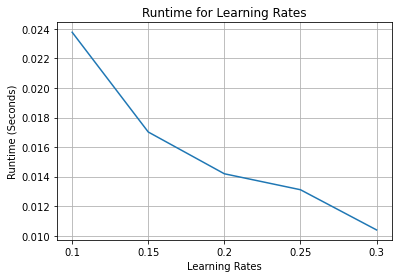

In [78]:
#Creates the runtime data by learning rate
run_time_delta = []
for values in range(len(run_time)):
    run_time_delta.append(run_time[values][1] - run_time[values][0])

#Plots the runtime on a line graph
plt.plot(learning_rate_list, run_time_delta)

plt.xticks(learning_rate_list, learning_rate_list)
plt.title("Runtime for Learning Rates")
plt.xlabel("Learning Rates")
plt.ylabel("Runtime (Seconds)")
plt.grid()
plt.show()

<H2>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Conclusion</H2>
<H4>Cost Function Values over Iterations </H4>
The Cost Function over Iterations graph shows that the smaller the learning rate, the slower the descent to the limit(the convergence) is, thus increasing the number of iterations. In connection to the descent, since the steps are smaller, the estimate will be closer to the true value as it is able to get within a closer range of epsilon. Giving a more accurate estimation. 
<H4>Runtime for Learning Rates</H4>
The runtime for each learning rate ties into the number of iterations the algorithm will take. When the learning rate is higher, the algorithm will take larger steps towards the convergence, but when it converges, it can be further away. The theta0 and theta1 values that were outputted for each run slowly increased as alpha increased. Since the cost function values are decreasing as it progresses, it shows that the accuracy is the tradeoff.

Overall, by increasing the learning rate, you are sacrificing accuracy for time efficency. 
